In [1]:
import gensim
from gensim import corpora
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [2]:
!pip install pyLDAvis
import jieba
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as pg
import matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/My Drive/POLI/POLI179_final_project/Data/final_data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
stopwords_files = ['baidu_stopwords.txt', 'cn_stopwords.txt',
                   'hit_stopwords.txt', 'scu_stopwords.txt']
stopwords = set()
for filename in stopwords_files:
    file_path = os.path.join('/content/drive/My Drive/POLI/POLI179_final_project/Stopwords/', filename)
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        stopwords.update([line.strip() for line in file.readlines()])

additional_stopwords = {'年', '月', '日', '第版', '说', '中', '更','年 月 日','月 日','时','我国','杨丽','总','这是','记者','做','里','一年','包括','年月日','一是',
                        '二是','要','新','亿元','没','岁','想', '应','一种','郑', '走','老', '前','干','吃','越来越','记者','进一步','元','来到','找','事','带','买',
                        '成','住','本版','本报记者','达','占','镇','村','名','区','来到','一条','建成','性','绣','黄花','去年','提出','介绍','出','搬','李心萍','万元',
                        '亿元','万人','千人','周永康','嫌疑人','第一节','第二节','第三节','万亿元','加快','支农','出','水','据','一季度','二季度',
                        '三季度','四季度','上年','比上','拉动','',''}
stopwords.update(additional_stopwords)

print("Total stopwords loaded:", len(stopwords))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total stopwords loaded: 2396


In [6]:
def preprocess_text(text):
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
data['segmented_text'] = data['TextBody'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.810 seconds.
DEBUG:jieba:Loading model cost 0.810 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [8]:
dictionary = Dictionary(data['segmented_text'])
corpus = [dictionary.doc2bow(text) for text in data['segmented_text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA for all

In [ ]:
lda = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=30, random_state=1)

In [ ]:
topics = lda.print_topics(num_words=15)
for topic in topics:
    print(topic)

coherence_model_cv = CoherenceModel(model=lda, texts=data['segmented_text'].tolist(), dictionary=dictionary, coherence='u_mass')
print("Coherence:", coherence_model_cv.get_coherence())

(0, '0.057*"就业" + 0.017*"保障" + 0.015*"政策" + 0.013*"服务" + 0.011*"人员" + 0.011*"制度" + 0.011*"救助" + 0.008*"毕业生" + 0.007*"实施" + 0.007*"住房" + 0.007*"养老保险" + 0.006*"失业" + 0.006*"万人" + 0.006*"社会" + 0.006*"困难"')
(1, '0.049*"农村" + 0.033*"农业" + 0.028*"乡村" + 0.022*"农民" + 0.015*"建设" + 0.011*"推进" + 0.010*"振兴" + 0.008*"发展" + 0.008*"农产品" + 0.008*"支持" + 0.007*"生产" + 0.007*"加快" + 0.007*"工作" + 0.007*"完善" + 0.007*"政策"')
(2, '0.072*"农民工" + 0.033*"工资" + 0.022*"培训" + 0.020*"企业" + 0.019*"就业" + 0.014*"拖欠" + 0.011*"欠薪" + 0.010*"支付" + 0.010*"劳动" + 0.009*"返乡" + 0.009*"用工" + 0.008*"工作" + 0.008*"技能" + 0.007*"劳动力" + 0.007*"创业"')
(3, '0.084*"移民" + 0.020*"工程" + 0.018*"安置" + 0.018*"库区" + 0.016*"三峡工程" + 0.015*"重庆" + 0.014*"建设" + 0.012*"三峡" + 0.011*"南水北调" + 0.009*"工作" + 0.008*"搬迁" + 0.008*"三峡库区" + 0.007*"国务院" + 0.006*"资金" + 0.006*"重庆市"')
(4, '0.018*"智能" + 0.013*"灾区" + 0.012*"四川" + 0.010*"重建" + 0.009*"地震" + 0.009*"湖南" + 0.008*"出入境" + 0.006*"受灾" + 0.005*"灾后" + 0.004*"湖南省" + 0.004*"台湾" + 0.004*"武汉市" + 0.004*"湖" + 0.004*"自助"

In [ ]:
#计算困惑度
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)
#计算coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data['segmented_text'], dictionary=dictionary, coherence='u_mass')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

[(0, '0.009*"发展" + 0.007*"农民工" + 0.006*"建设" + 0.006*"工作" + 0.006*"农村" + 0.005*"就业" + 0.004*"企业" + 0.004*"服务" + 0.004*"社会" + 0.003*"推进"')]
-0.7950905854177163
[(0, '0.014*"发展" + 0.009*"建设" + 0.009*"就业" + 0.008*"农村" + 0.007*"工作" + 0.006*"服务" + 0.006*"推进" + 0.006*"社会" + 0.005*"企业" + 0.005*"政策"'), (1, '0.012*"农民工" + 0.006*"移民" + 0.004*"工作" + 0.003*"企业" + 0.003*"工资" + 0.003*"群众" + 0.003*"生活" + 0.003*"工程" + 0.002*"公司" + 0.002*"孩子"')]
-1.128108133673504
[(0, '0.026*"农民工" + 0.009*"工作" + 0.007*"社会" + 0.007*"企业" + 0.007*"工资" + 0.006*"服务" + 0.005*"管理" + 0.004*"部门" + 0.004*"保障" + 0.004*"劳动"'), (1, '0.017*"发展" + 0.011*"建设" + 0.010*"农村" + 0.010*"就业" + 0.007*"推进" + 0.006*"农业" + 0.006*"工作" + 0.005*"政策" + 0.005*"服务" + 0.005*"企业"'), (2, '0.009*"移民" + 0.004*"群众" + 0.003*"工作" + 0.003*"工程" + 0.003*"生活" + 0.003*"搬迁" + 0.003*"村民" + 0.003*"孩子" + 0.003*"总书记" + 0.002*"人民"')]
-1.1077767436025256
[(0, '0.019*"农民工" + 0.011*"工作" + 0.008*"社会" + 0.008*"工资" + 0.007*"管理" + 0.006*"服务" + 0.006*"企业" + 0.005*"保障" + 0.005*"

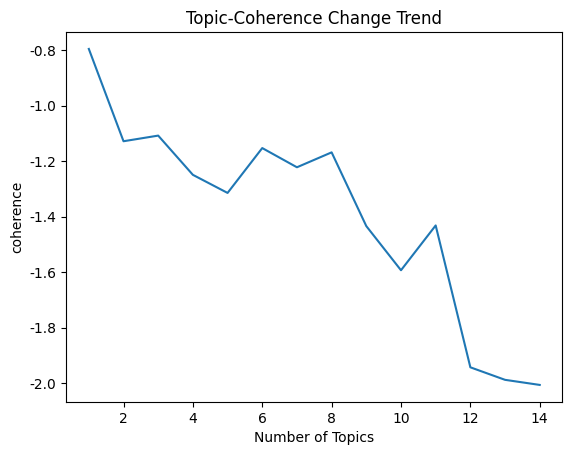

In [ ]:
x = range(1,15)
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('coherence')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('Topic-Coherence Change Trend')
plt.show()

[(0, '0.009*"发展" + 0.007*"农民工" + 0.006*"建设" + 0.006*"工作" + 0.006*"农村" + 0.005*"就业" + 0.004*"企业" + 0.004*"服务" + 0.004*"社会" + 0.003*"推进" + 0.003*"政策" + 0.003*"农民" + 0.003*"保障" + 0.003*"农业" + 0.003*"经济"')]
-9.094795916762408
[(0, '0.014*"发展" + 0.009*"建设" + 0.009*"就业" + 0.008*"农村" + 0.007*"工作" + 0.006*"服务" + 0.006*"推进" + 0.005*"社会" + 0.005*"企业" + 0.005*"政策" + 0.005*"农业" + 0.005*"制度" + 0.004*"保障" + 0.004*"经济" + 0.004*"农民"'), (1, '0.013*"农民工" + 0.006*"移民" + 0.005*"工作" + 0.004*"工资" + 0.003*"群众" + 0.003*"企业" + 0.003*"生活" + 0.003*"工程" + 0.002*"公司" + 0.002*"孩子" + 0.002*"民工" + 0.002*"搬迁" + 0.002*"村民" + 0.002*"人民" + 0.002*"总书记"')]
-8.934997401342777
[(0, '0.010*"移民" + 0.004*"群众" + 0.004*"工程" + 0.003*"工作" + 0.003*"生活" + 0.003*"搬迁" + 0.003*"村民" + 0.003*"总书记" + 0.002*"人民" + 0.002*"安置" + 0.002*"扶贫" + 0.002*"孩子" + 0.002*"青年" + 0.002*"建设" + 0.002*"宁夏"'), (1, '0.018*"发展" + 0.011*"建设" + 0.010*"农村" + 0.007*"推进" + 0.006*"农业" + 0.006*"工作" + 0.006*"就业" + 0.005*"服务" + 0.005*"乡村" + 0.005*"政策" + 0.005*"经济" + 0.0

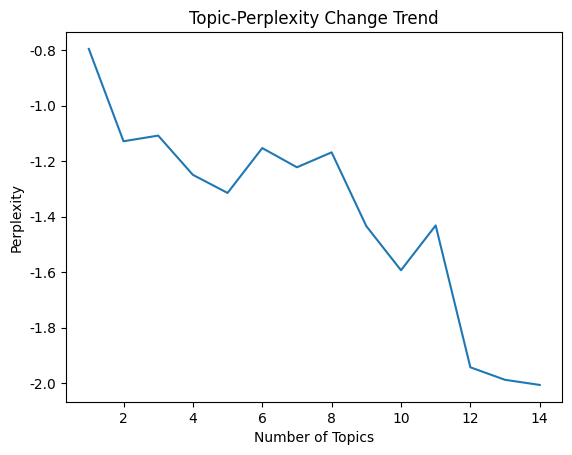

In [ ]:
x = range(1,15)
z = [perplexity(i) for i in x]
plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('Topic-Perplexity Change Trend')
plt.show()

In [ ]:
import pyLDAvis

In [ ]:
# Visualize Topics
vis_data = pg.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(vis_data, '/content/drive/My Drive/POLI/POLI179_final_project/Output/lda_visualization.html')

Time Series LDA

In [9]:
# Assuming 'Year' is the column by which you'll segment your data
grouped_data = data.groupby('Year')['TextBody'].apply(lambda texts: ' '.join(texts)).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
grouped_data['processed_text'] = grouped_data['TextBody'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Create dictionary
dictionary = corpora.Dictionary(grouped_data['processed_text'])

# Create corpus
corpus = [dictionary.doc2bow(text) for text in grouped_data['processed_text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Number of topics
num_topics = 4

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
from pprint import pprint

# Print topics for each time slice
grouped_data['year_topics'] = grouped_data['processed_text'].apply(lambda doc: lda_model[dictionary.doc2bow(doc)])

# Display the dominant topics for each year
for year, topics in zip(grouped_data['Year'], grouped_data['year_topics']):
    print(f"\nYear: {year}")
    pprint(sorted(topics, key=lambda x: x[1], reverse=True))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Year: 1970
[(0, 0.9999634)]

Year: 1971
[(0, 0.99991727)]

Year: 1972
[(0, 0.99739826)]

Year: 1973
[(0, 0.9999617)]

Year: 1974
[(0, 0.9999566)]

Year: 1975
[(0, 0.99996805)]

Year: 1976
[(0, 0.9999363)]

Year: 1977
[(0, 0.99094915)]

Year: 1978
[(0, 0.983336), (2, 0.016096158)]

Year: 1979
[(0, 0.85820985), (2, 0.13436121)]

Year: 1980
[(2, 0.9063873), (0, 0.09346695)]

Year: 1981
[(2, 0.8994981), (0, 0.10041916)]

Year: 1982
[(2, 0.9731715), (0, 0.026634138)]

Year: 1983
[(2, 0.8063409), (0, 0.19346687)]

Year: 1984
[(2, 0.9998837)]

Year: 1985
[(2, 0.9990936)]

Year: 1986
[(2, 0.9946035)]

Year: 1987
[(2, 0.99988425)]

Year: 1988
[(2, 0.9999208)]

Year: 1990
[(2, 0.9912256)]

Year: 1991
[(2, 0.79909015), (1, 0.20086733)]

Year: 1992
[(1, 0.99993575)]

Year: 1993
[(1, 0.7853946), (2, 0.2144604)]

Year: 1994
[(2, 0.87210584), (1, 0.12759905)]

Year: 1995
[(1, 0.77992356), (2, 0.17589958), (3, 0.044165514)]

Year: 1996
[(2, 0.83348393), (1, 0.16647434)]

Year: 1997
[(1, 0.91811407), 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


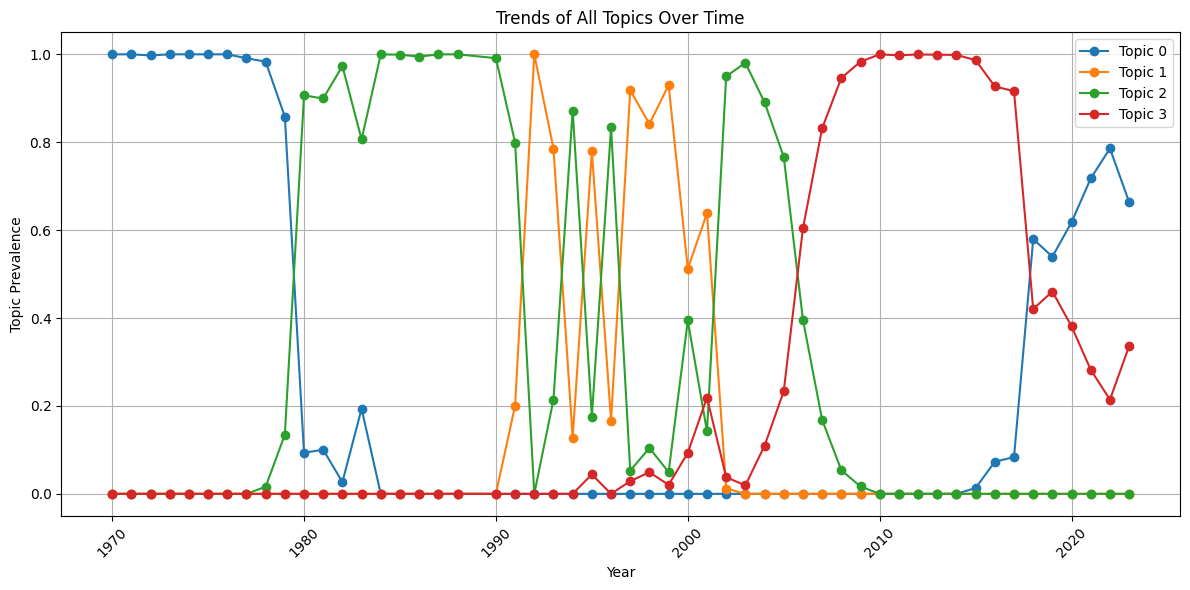

In [22]:
import matplotlib.pyplot as plt

# Number of topics
num_topics = 4

topic_prevalence = [[] for _ in range(num_topics)]
years = grouped_data['Year'].tolist()

for index, row in grouped_data.iterrows():
    topic_distribution = dict(row['year_topics'])
    for topic_id in range(num_topics):
        topic_prevalence[topic_id].append(topic_distribution.get(topic_id, 0))

plt.figure(figsize=(12, 6))

for topic_id in range(num_topics):
    plt.plot(years, topic_prevalence[topic_id], marker='o', linestyle='-', label=f'Topic {topic_id}')

plt.title('Trends of All Topics Over Time')
plt.xlabel('Year')
plt.ylabel('Topic Prevalence')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the visualization as an HTML file
output_path = '/content/drive/My Drive/POLI/POLI179_final_project/Output/yearlylda_visualization.html'
pyLDAvis.save_html(vis, output_path)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
